### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score                           
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv("dataset (1).csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Perfoming Exploratory Data Analysis

In [3]:
df.shape

(43400, 12)

**We can see that we have 43400 observations and 12 features in our dataset**

In [4]:
#check the column we have
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Check for null values

In [5]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**As we can see that `bmi` have around 1500 null values and `smoking_status` has around 13000 null values.**

Check for the basic information about the datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
class_dist = df['stroke'].value_counts()
class_dist

stroke
0    42617
1      783
Name: count, dtype: int64

**We can see that frequency of not-stroke is 42617 and frequency of stroke is 783 this proves that our data is imabalanced we have to use `Smote` technique to fix this kind of problem**

In [8]:
imbalance_ratio = class_dist.min() / class_dist.max()
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 0.02


In [9]:
imbalance_percentage = (1 - imbalance_ratio) * 100
print(f'Imbalance Percentage: {imbalance_percentage:.2f}%')

Imbalance Percentage: 98.16%


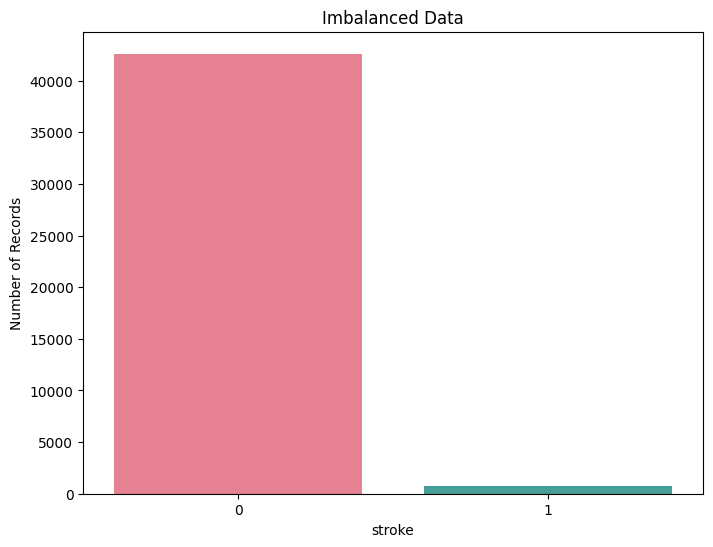

In [10]:
#we can see that through visualization
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_dist.index, y=class_dist.values, palette='husl')
plt.xlabel('stroke')
plt.ylabel('Number of Records')
plt.title('Imbalanced Data')
plt.show()

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [12]:
#checking missing values
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**As we can see that `bmi` have around 1500 null values and `smoking_status` has around 13000 null values. So we will use the Imputation techniques to fix it.**


We will use `KNNImputer` this will fill the null value with it's neighbours value

In [13]:
df['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [14]:
smoke_map = {'never smoked':0, 'smokes' : 1, 'formerly smoked': 2 }
df['smoking_status'] = df['smoking_status'].map(smoke_map)

**This Function will take array of columns and apply categorical encoding**

In [15]:
def categorical_encoding(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  float64
 11  stroke             43400 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.0+ MB


**Find the all categorical variables**

In [17]:
categorical_variables = []
for column in df.columns:
    if df[column].dtype =='object':
        categorical_variables.append(column)

In [18]:
categorical_variables

['gender', 'ever_married', 'work_type', 'Residence_type']

In [19]:
df = categorical_encoding(df, categorical_variables)

In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,NaN,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,0.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,NaN,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,2.0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,NaN,0


We still have null value we will use get rid of null values after splitting the data into train and test. Because of data leakage problem

### Feature Selection

In [21]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Id, ever_married  is not relatable if someone had stroke or not. So we will drop that columns**

In [22]:
df.drop(columns= ['id', 'ever_married'], inplace=True)

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

### Handiling Null values

#### Dataset have some missing values so we have to handle that,we have different strategies to handle missing values like 
- mean,median,mode imputation
- forward fill or backward fill
- interpolation
- K-NN imputation 
- Advanced Techniques-> Use machine learning models, such as decision trees or random forests, to predict missing values.

In [24]:
# we use KNN imputation technique to handle missing values
imputer = KNNImputer(missing_values=np.nan)
col_for_imput = ['bmi', 'smoking_status']
df[col_for_imput] = imputer.fit_transform(df[col_for_imput])

In [28]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Create Dependent and Independent Variable

In [25]:
X = df.drop('stroke',axis=1)
y = df['stroke']

### Split the data into train and test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### Feature scaling

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
X_train_scaled

array([[-0.82966408, -0.14395042, -0.32249752, ..., -0.02645949,
        -0.92201532, -0.95521207],
       [-0.82966408, -0.71915274, -0.32249752, ..., -1.11522062,
        -0.38895597, -0.95521207],
       [-0.82966408, -0.45367475, -0.32249752, ..., -0.91722179,
        -0.66198637, -0.13152766],
       ...,
       [-0.82966408,  0.74097623, -0.32249752, ..., -0.53005508,
        -0.81800374, -0.95521207],
       [-0.82966408, -1.84831915, -0.32249752, ..., -0.56049856,
        -0.93501677, -0.13152766],
       [-0.82966408,  0.91796156, -0.32249752, ..., -0.29347903,
         0.05309325, -0.95521207]])

In [31]:
X_test_scaled

array([[ 1.19734999, -0.05083611,  3.13991229, ..., -0.69053301,
         0.05910159,  1.79948173],
       [-0.83359019,  0.08352319, -0.31848023, ...,  0.06468606,
         2.39461982, -0.96499893],
       [ 1.19734999, -0.94656473, -0.31848023, ...,  1.25201977,
        -0.62857878, -0.96499893],
       ...,
       [ 1.19734999, -1.66314763, -0.31848023, ..., -0.42932422,
        -1.45898526, -0.4121028 ],
       [ 1.19734999, -1.34964261, -0.31848023, ...,  0.07161467,
        -1.12163263, -0.13565473],
       [-0.83359019, -0.14040897, -0.31848023, ...,  1.76358253,
         0.77273216, -0.96499893]])

### Making the Model

In [39]:
#training knn model on training set
knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

classifier = [knn,lr,dt,rf]
acc = {}
for model in classifier:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc[model] = accuracy_score(y_test,y_pred)
    

In [40]:
acc

{KNeighborsClassifier(): 0.981874039938556,
 LogisticRegression(): 0.9824116743471583,
 DecisionTreeClassifier(): 0.9619815668202765,
 RandomForestClassifier(): 0.9821812596006144}

Accuracy for all the models is high,The models accurately predicts the 0 but not 1.
precision is close to zero in all the cases,which means model failed 
predict the cases where chances for cerebral stroke was actually present
so it give wrong output

### Oversampling

SMOTE  (Synthetic Minority Over-sampling Technique) technique can be used to reduce the imbalance or 
to make class distribution even .SMOTE helps increase the size of the minority class, making it more balanced with the majority class.

In [42]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os,y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

Model Building and Evaluation

In [43]:
knn1 = KNeighborsClassifier()
lr1 = LogisticRegression()
dt1 = DecisionTreeClassifier()
rf1 = RandomForestClassifier()

classifier = [knn1,lr1,dt1,rf1]
acc_smote ={}
for model in classifier:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    acc_smote[model] = accuracy_score(y_test,y_pred)

In [44]:
acc_smote

{KNeighborsClassifier(): 0.914903601736342,
 LogisticRegression(): 0.7983262289312112,
 DecisionTreeClassifier(): 0.9698877634820695,
 RandomForestClassifier(): 0.9803292792616636}

After applying SMOTE technique, the precision increased. For KNN it is 0.82, for Decision Tree it is 0.98 and RandomForest it is 1.0. So oversampling resulted in a better model
that is capable of identifying the cases positive for stroke.

### UnderSampling

In this method to create a more balanced class distribution
we randomly delete the rows of the majority class.
the ENN (Edited Nearest Neighbors) technique is applied
to remove potentially misclassified or noisy samples.
Here we are using RandomUnderSampler class for this purpose.

In [45]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=1)
X_us,y_us = us.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)

#### Model Building and Evaluation

In [46]:
knn2 = KNeighborsClassifier()
lr2 = LogisticRegression()
dt2 = DecisionTreeClassifier()
rf2 = RandomForestClassifier()

classifier = [knn2,lr2,dt2,rf2]
acc_und = {}
for model in classifier:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_und[model] = accuracy_score(y_test,y_pred)

In [47]:
acc_und

{KNeighborsClassifier(): 0.7382978723404255,
 LogisticRegression(): 0.774468085106383,
 DecisionTreeClassifier(): 0.6957446808510638,
 RandomForestClassifier(): 0.7425531914893617}

The precision is less than before but better than the one
without resampling.The undersampling results in loss of data,
so it is not recommended in this case.

#### Combining Oversampling and Undersampling

SMOTEEN combines SMOTE and Edited Nearest Neighbours(ENN).
SMOTE-ENN can improve the balance of the dataset while potentially
enhancing the quality of the data.
SMOTEEN performs upsampling and downsampling at the same time.

In [48]:
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

### Model Building and Evaluation

In [51]:
knn3 = KNeighborsClassifier()
lr3 = LogisticRegression()
dt3 = DecisionTreeClassifier()
rf3 = RandomForestClassifier()
acc_smoten = {}
classifier = [knn3,lr3,dt3,rf3]

for model in classifier:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_smoten[model] = accuracy_score(y_test,y_pred)

In [52]:
acc_smoten

{KNeighborsClassifier(): 0.9711994481331379,
 LogisticRegression(): 0.83547469173062,
 DecisionTreeClassifier(): 0.9716305941191687,
 RandomForestClassifier(): 0.9816331809950849}